In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_DATA_FILES/Car_Car Dekho.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.drop(columns=['Car_Name'], axis = 1, inplace = True)

In [7]:
df.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [8]:
df["Current_Year"] = 2020

In [9]:
df.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020


In [10]:
df["Car_Age"] = df['Current_Year'] - df['Year']
df.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6


In [11]:
df.drop(columns=["Year", "Current_Year"], axis = 1, inplace = True)

In [12]:
df.head(1)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6


In [13]:
df = pd.get_dummies(df, drop_first=True) # Dropped CNG with the help of drop_first #
df.head(1)

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1


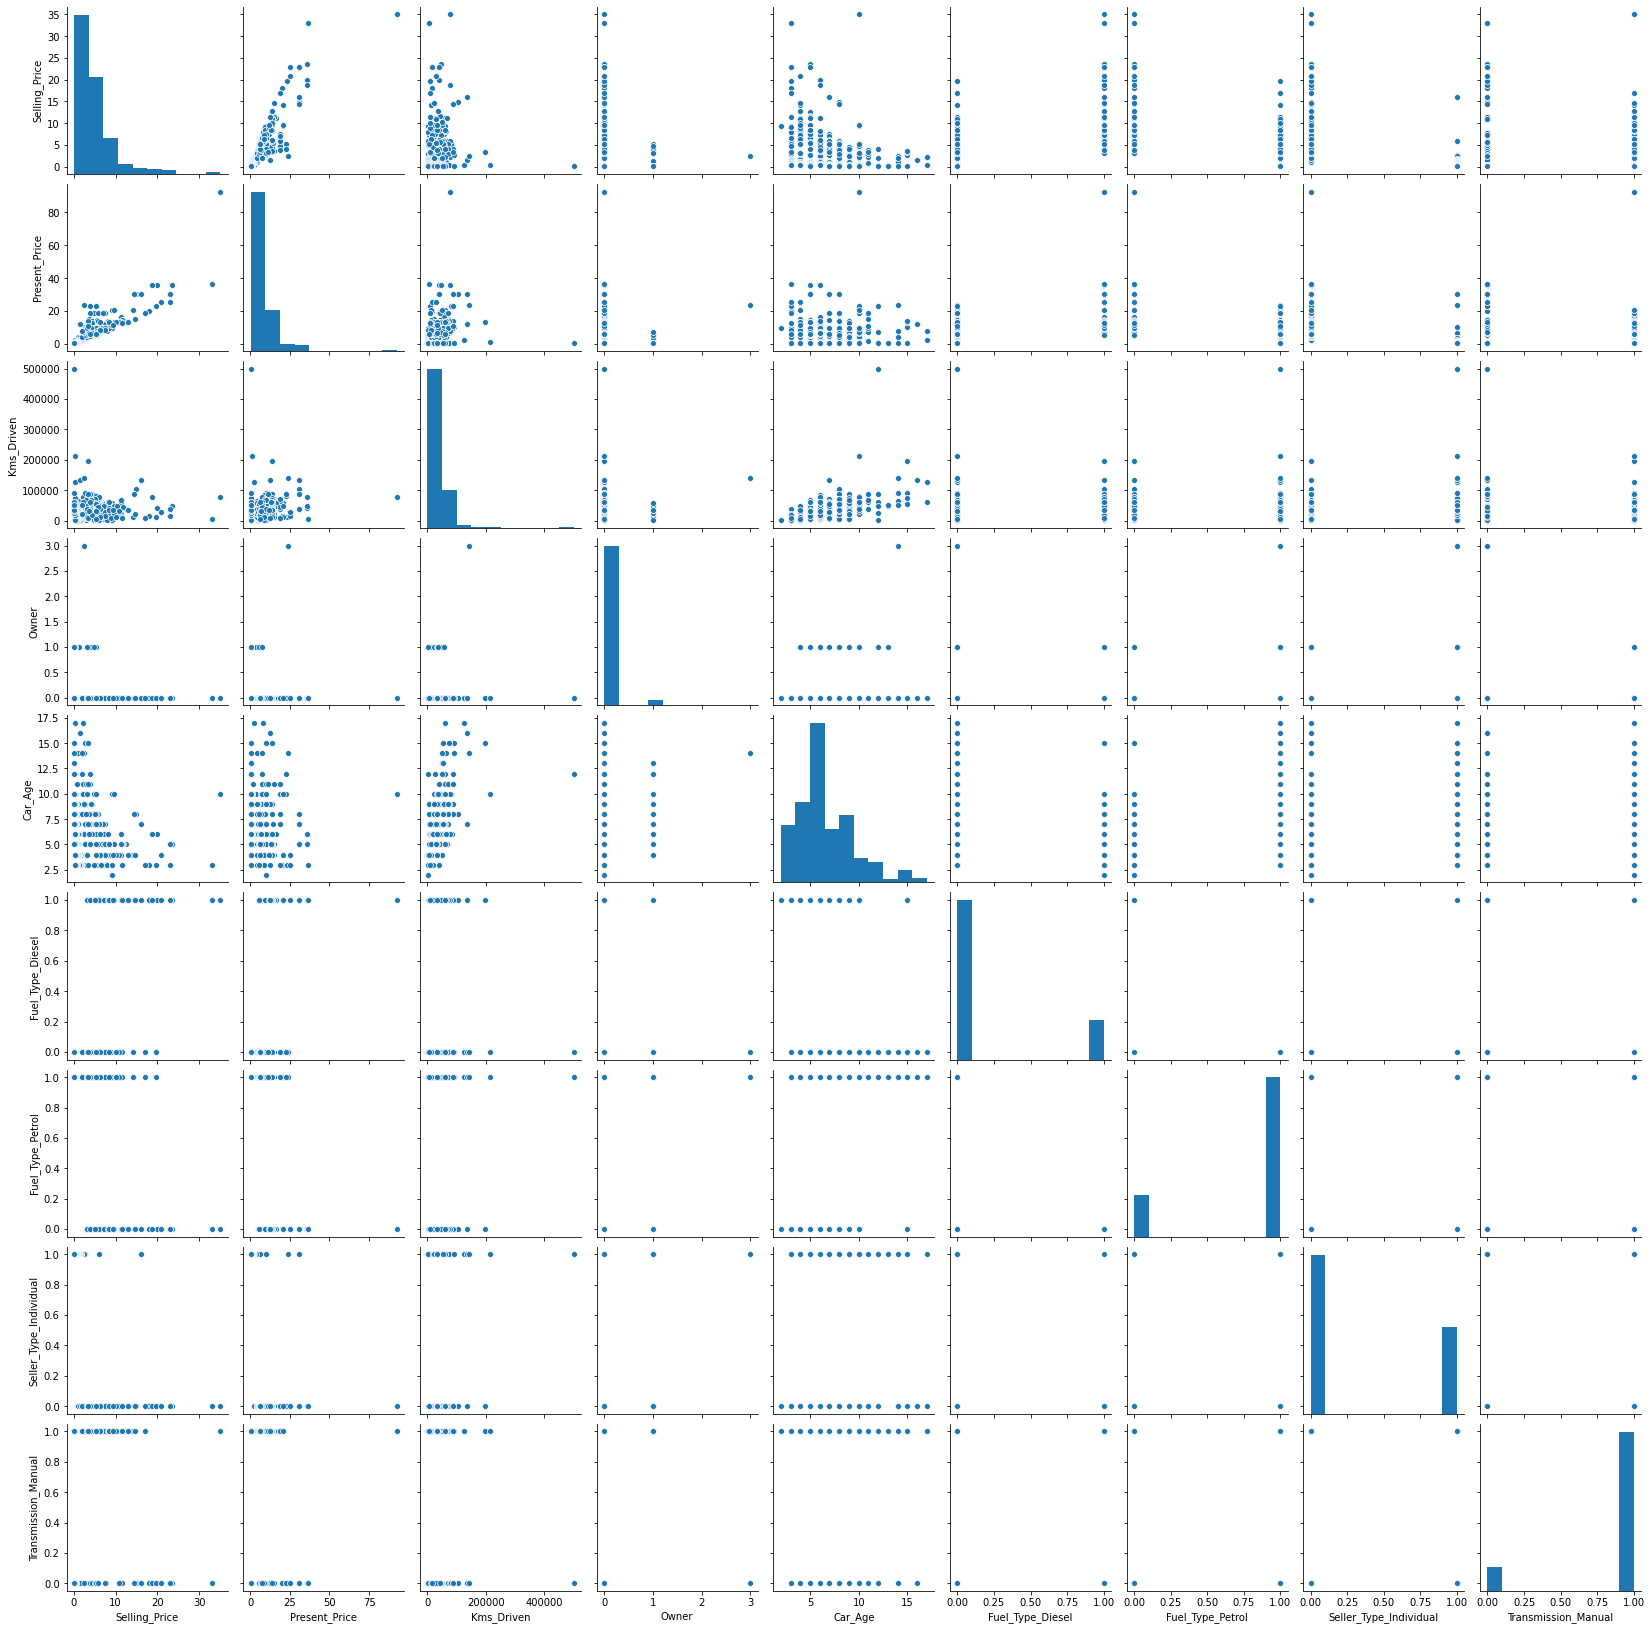

In [14]:
sns.pairplot(df)

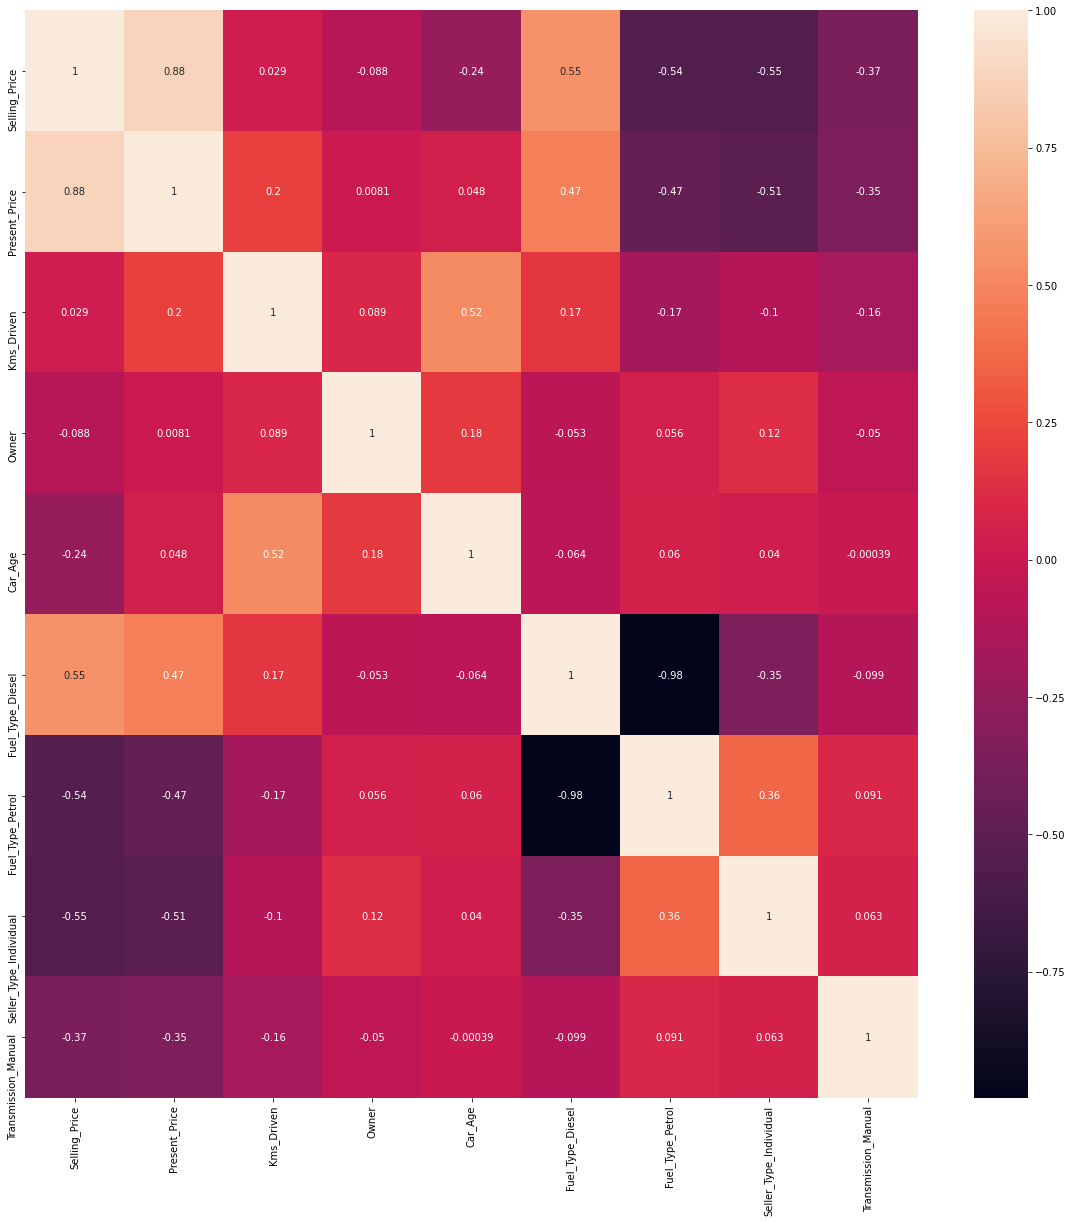

In [15]:
cormat = df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'rocket')

In [16]:
x = df.iloc[:, 1:]
y = df.iloc[:,0]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.ensemble import ExtraTreesRegressor

In [19]:
regressor = ExtraTreesRegressor()
regressor.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [20]:
print(regressor.feature_importances_)

[0.3823223  0.03931802 0.00072453 0.07650551 0.22002642 0.01647779
 0.12776463 0.13686079]


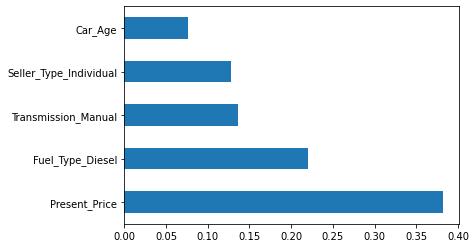

In [21]:
importances = pd.Series(regressor.feature_importances_, index = x.columns)
importances.nlargest(5).plot(kind = 'barh')
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/3, random_state = 0)

In [23]:
from sklearn.model_selection import RandomizedSearchCV # Grid search cv can also be used.

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
re_fo = RandomForestRegressor()

#### Hyper Parameter tuning

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print("n_estimators:",n_estimators)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples reuired to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples reuired at each leaf node
min_samples_leaf = [1,2,5,10]

n_estimators: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [27]:
# Random grid for random search cv
random_grid = {
                'n_estimators': n_estimators,
                'max_features' : max_features,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
rf_random = RandomizedSearchCV(estimator=re_fo, param_distributions=random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [29]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [30]:
prediction = rf_random.predict(x_test)

In [31]:
prediction

array([ 7.16375,  0.56409,  5.04973,  9.25367, 16.52584,  4.96627,
        3.4498 ,  0.76823,  4.51057,  4.4936 ,  3.11346,  0.88335,
        4.99063,  7.80558,  7.9508 , 10.25563,  7.40117,  4.06145,
        0.49543,  1.46856,  4.08077,  4.69019,  5.39572,  9.48085,
        0.24467,  0.77519,  0.5942 ,  0.65239,  0.5115 ,  4.94297,
        5.25936,  5.8491 ,  0.52154,  8.96066,  3.548  ,  1.1606 ,
        5.64162,  7.5219 ,  0.28137,  8.90291,  9.4917 , 19.35765,
        4.90247,  4.17235,  5.3645 , 11.82745,  0.31023,  0.89882,
        4.9979 ,  8.59805,  7.33216,  3.51011,  4.7456 , 20.57685,
        1.09076,  1.01743,  0.50339,  2.7365 ,  3.615  ,  1.35918,
        4.02445,  8.58594,  3.23939, 21.05238,  4.20131,  5.60159,
       10.08759,  4.87429,  0.53513,  3.02542,  3.38965,  2.96685,
        0.66305,  5.45005,  0.91019,  2.97256,  0.52638,  9.13191,
        0.79073,  2.73087,  0.51086,  9.86631,  7.59118,  5.333  ,
        5.22682,  0.93355,  6.59769,  6.0519 ,  0.45171,  4.94

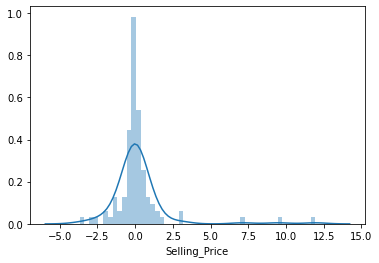

In [32]:
sns.distplot(y_test-prediction)

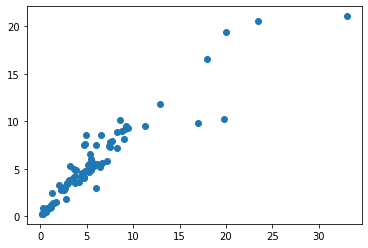

In [33]:
plt.scatter(y_test, prediction)

In [34]:
import pickle

In [35]:
file = open('random_forest_cars.pkl', 'wb')
pickle.dump(rf_random, file)